# 1 Author

**Student Name**:  Yiwei Sun  
**Student ID**:  210978667



# 2 Problem formulation

Since we can only use the Genki4k dataset and not the additional data, after all the labels have been used in basic, we want to perform some unlabeled classification tasks on the images using unsupervised learning image clustering.

Unsupervised learning image clustering is interesting for several reasons:

1.  **Discovering Patterns**: Unsupervised learning can help discover hidden patterns and structures in data that humans might not notice.  This is particularly useful in image data where patterns can be complex and multi-dimensional.

2.  **Scalability**: It can handle large amounts of data where manual labeling would be impractical or impossible.  This is often the case with image data, which can consist of millions of individual pixels.

3.  **Flexibility**: It doesn't require a specific outcome variable or prediction target.  This makes it flexible and applicable to a wide range of tasks.

## 3.1 Importing

- Importing the necessary modules and packages:

- In this section, we are importing all the necessary modules and packages that we will need for our project. 


| Module/Package | Description |
| --- | --- |
| `torch` | PyTorch, a library for processing tensors and building neural networks. |
| `torchvision` | A package that provides access to popular datasets, model architectures, and image transformations for computer vision. |
| `torchvision.transforms` | A module that provides common image transformations. |
| `torchvision.models.resnet50` | A module that provides the ResNet-50 model architecture. |
| `torchvision.models.resnet.ResNet50_Weights` | A module that provides pre-trained weights for the ResNet-50 model. |
| `PIL.Image` | The Python Imaging Library (PIL) module for opening, manipulating, and saving many different image file formats. |
| `os` | A module providing functions for interacting with the operating system. |
| `torch.utils.data.TensorDataset, DataLoader` | Modules that provide utilities for wrapping tensors into a dataset, and for loading the data. |
| `sklearn.cluster.KMeans` | A module that provides the KMeans clustering algorithm. |
| `matplotlib.pyplot` | A module that provides functions for creating static, animated, and interactive visualizations in Python. |
| `numpy` | A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. |

## 3.2 Parameter Settings

- Setting various parameters here

In this section, we are setting various parameters for our model. 


| Variable | Description |
| --- | --- |
| `data_dir` | The directory where the data files are stored. |
| `batch_size` | The number of samples processed before the model is updated. |
| `feature_dim` | The dimensionality of the feature vectors. |
| `n_clusters` | The number of clusters to form as well as the number of centroids to generate. |
| `device` | The device (CPU or GPU) where the tensors will be allocated. |

## 3.3 Dataset Processing

Normalized images and added them to the dataset and dataloader

## 3.4 Model Definition

Resnet50 was used as the model to extract the feature vectors of the picture

## 3.5 Performing clustering

The images are sent to resnet for feature extraction, and then kmeans is used for clustering

## 3.6 Result visualization

Select the data in each cluster that is closest to the center of the cluster, which is the picture, and display them

## 4 Transformation stage

The processing part of the picture is only a simple normalization and the reverse normalization is performed when the picture is displayed

**normalization:**

```python
# Composing transformations for the images
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
```

**reverse normalization:**  

```python
# Function to inverse transform the image tensor
def inverse_transform(img_tensor):
    denormalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225])
    img_tensor = denormalize(img_tensor)
    img = transforms.ToPILImage()(img_tensor)
    return img

```

In [156]:
from torchvision import transforms

# Function to inverse transform the image tensor
def inverse_transform(img_tensor):
    denormalize = transforms.Normalize(mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225], std=[1/0.229, 1/0.224, 1/0.225])
    img_tensor = denormalize(img_tensor)
    img = transforms.ToPILImage()(img_tensor)
    return img

# Composing transformations for the images
data_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])


# 5 Modelling

1. **Import Necessary Libraries and Models**: The code begins by importing the necessary libraries and models. It imports the `torch` library, the `resnet50` model from `torchvision.models`, and the `ResNet50_Weights` from `torchvision.models.resnet`.

2. **Define the Function**: The function `create_model` is defined with three parameters: `feature_dim`, `device`, and `using_identity`. 

    - `feature_dim` is the number of output features for the fully connected layer.
    - `device` is the device where the model will be stored.
    - `using_identity` is a boolean flag that determines whether to use an identity mapping for the fully connected layer.

3. **Create the Model**: Inside the function, a ResNet50 model is created with weights initialized from the ImageNet dataset.

4. **Customize the Fully Connected Layer**: Depending on the value of `using_identity`, the fully connected layer of the model is customized. If `using_identity` is `True`, the fully connected layer is replaced with an identity mapping. Otherwise, a new fully connected layer is created with `feature_dim` output features. The weights and bias of the new fully connected layer are initialized with the identity matrix and zeros, respectively.

5. **Freeze the Parameters**: The parameters of the model are frozen, meaning they will not be updated during training.

6. **Prepare the Model for Evaluation**: The model is moved to the specified device and set to evaluation mode.

7. **Return the Model**: Finally, the function returns the created model.

This function allows for the creation of a ResNet50 model with a custom fully connected layer, which can be useful for various machine learning tasks. The ability to freeze the parameters and set the model to evaluation mode makes this function versatile for both training and inference scenarios. The option to use an identity mapping for the fully connected layer provides flexibility in the model architecture.

In [157]:
import torch
from torchvision.models import resnet50
from torchvision.models.resnet import ResNet50_Weights

def create_model(feature_dim, device, using_identity):
    """
    Function to create a ResNet50 model with a custom fully connected layer.

    Parameters:
    feature_dim (int): The number of output features for the fully connected layer.
    device (torch.device): The device where the model will be stored.

    Returns:
    model: A ResNet50 model with a custom fully connected layer.
    """

    # Creating the model
    model = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)

    if using_identity:
        model.fc = torch.nn.Identity()
    else:
        # Replacing the fully connected layer
        model.fc = torch.nn.Linear(model.fc.in_features, feature_dim)

        # Initializing the weights and bias of the fully connected layer
        torch.nn.init.eye_(model.fc.weight)
        torch.nn.init.zeros_(model.fc.bias)

        # Freezing the parameters of the model
        for param in model.parameters():
            param.requires_grad = False

    # Moving the model to the device and setting it to evaluation mode
    model = model.to(device)
    model.eval()

    return model


# 6 Methodology

The code you provided outlines a methodology for extracting features from images, reducing the dimensionality of these features, clustering the reduced features, and visualizing the results. Here's a breakdown:

1. **Feature Extraction**: The `extract_features` function takes a model and a DataLoader with images, and extracts features from the images using the model. The features are then concatenated into a single tensor.

2. **Dimensionality Reduction and Clustering**: The `pca_cluster` function uses PCA to reduce the features to 2D. It then uses a specified clustering algorithm (either DBSCAN or K-means) to cluster the reduced features. The function also computes the centers of the clusters.

3. **Visualization**: The `plot_clusters` function visualizes the clustering results. It plots the reduced features and the centers of the clusters, and adds the cluster names to the center points.

4. **Closest Images to Cluster Center**: The `show_closest_images` function shows the closest images to the center of a specified cluster. It takes the cluster index, the reduced features, the centers of the clusters, the original images, the inverse transformations to be applied to the images, the device, and the number of images to show as parameters.

This methodology allows for the extraction of meaningful features from images, the grouping of similar images into clusters, and the visualization of the clustering results. It can be useful in various machine learning tasks, such as image classification, image retrieval, and anomaly detection. The flexibility in choosing the clustering algorithm and the number of clusters allows for adaptability to different datasets and tasks. The visualization of the clustering results provides an intuitive understanding of the distribution and grouping of the images. The function to show the closest images to the center of a cluster can be useful in understanding the characteristics of each cluster. 



In [158]:

def extract_features(model, train_loader):
    """
    Function to extract features from images using a model.

    Parameters:
    model (torch.nn.Module): The model to use for feature extraction.
    train_loader (DataLoader): The DataLoader with the images.

    Returns:
    features (torch.Tensor): The features of the images.
    """

    # Extracting features from the images
    features = []
    with torch.no_grad():
        for (x,) in train_loader:
            output = model(x)
            features.append(output)

    # Concatenating the features into a single tensor
    features = torch.cat(features, dim=0)

    return features


In [159]:

import numpy as np
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans
import matplotlib.pyplot as plt

def pca_cluster(features, cluster_algo, eps, min_samples, n_clusters):
    """
    Function to use PCA to reduce the features to 2D and use a clustering algorithm to cluster the features.

    Parameters:
    features (torch.Tensor): The features of the images.
    cluster_algo (str): The clustering algorithm to use, either "DBSCAN" or "K-means".
    eps (float): The parameter for DBSCAN, the maximum distance between two samples to be considered as neighbors.
    min_samples (int): The parameter for DBSCAN, the number of neighbors for a sample to be considered as a core point.
    n_clusters (int): The parameter for K-means, the number of clusters.

    Returns:
    labels (numpy.ndarray): The labels of the clusters.
    centers (list): The centers of the clusters.
    pca (PCA): The PCA object used for dimensionality reduction.
    """

    # Using PCA to reduce the features to 2D
    pca = PCA(n_components=2)
    features_2d = pca.fit_transform(features.cpu().numpy())

    # Using a clustering algorithm to cluster the features
    if cluster_algo == "DBSCAN":
        cluster = DBSCAN(eps=eps, min_samples=min_samples)
    elif cluster_algo == "K-means":
        cluster = KMeans(n_clusters=n_clusters)
    else:
        raise ValueError("Invalid cluster algorithm")

    labels = cluster.fit_predict(features_2d)

    # Computing the centers of the clusters
    centers = []
    for i in np.unique(labels):
        if i != -1: # -1 means noise point, not belonging to any cluster
            center = features_2d[labels == i].mean(axis=0)
            centers.append(center)

    return labels, centers, pca



In [160]:

def plot_clusters(features_2d, labels, centers, cluster_algo):
    """
    Function to plot the clustering results.

    Parameters:
    features_2d (numpy.ndarray): The features of the images in 2D.
    labels (numpy.ndarray): The labels of the clusters.
    centers (list): The centers of the clusters.
    cluster_algo (str): The clustering algorithm used, either "DBSCAN" or "K-means".
    """

    # Plotting the clustering results
    plt.figure(figsize=(10, 10))
    plt.scatter(features_2d[:, 0], features_2d[:, 1], c=labels, cmap="rainbow")
    plt.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], marker="x", s=200, c="black")

    # Adding the cluster names to the center points
    for i, center in enumerate(centers):
        plt.text(center[0], center[1], f"{i}", fontsize=12, horizontalalignment="center", verticalalignment="top")

    plt.title(f"Clustering results using {cluster_algo}")
    plt.xlabel("PCA component 1")
    plt.ylabel("PCA component 2")
    plt.show()


In [161]:
def show_closest_images(cluster, features_2d, centers, X, inverse_transform, device, n_images):
    """
    Function to show the closest images to the center of a cluster.

    Parameters:
    cluster (int): The cluster index.
    features_2d (numpy.ndarray): The features of the images in 2D.
    centers (list): The centers of the clusters.
    X (list): The original images.
    inverse_transform (transforms.Compose): The inverse transformations to be applied to the images.
    device (torch.device): The device where the tensors are stored.
    n_images (int): The number of images to show.
    """

    # Computing the distance from the features to the center of the cluster
    dist = np.linalg.norm(features_2d - centers[cluster], axis=1)

    # Sorting the indices by the distance
    idx = np.argsort(dist)

    # Selecting the closest n_images indices
    idx = idx[:n_images]

    # Plotting the images
    plt.figure(figsize=(10, 10))
    for i in range(n_images):
        plt.subplot(5, 5, i+1)
        img_tensor = X[idx[i]]
        img = inverse_transform(img_tensor).convert('RGB')
        plt.imshow(img)
        plt.axis("off")
    plt.suptitle(f"Closest images to cluster {cluster}")
    plt.show()


# 7 Dataset


The "Dataset" section in the provided code involves the following steps:

1. **Image Loading**: Images are loaded from a specified directory and converted to the RGB format.

2. **Image Transformation**: The images are resized, converted to tensors, and normalized using predefined mean and standard deviation values.

3. **Tensor Stacking**: The list of image tensors is stacked into a single tensor.

4. **Dataset and DataLoader Creation**: A dataset is created from the image tensor, and a DataLoader is created from the dataset. The DataLoader batches the data and shuffles it.

In summary, the "Dataset" section in this code is all about preparing the image data to be used by the machine learning model. 

```python
X = []
for i in range(len(os.listdir(data_dir))):
    img_path = os.path.join(data_dir, f"file{i+1:04d}.jpg")
    img = Image.open(img_path).convert('RGB')
    img = data_transforms(img)
    X.append(img)

# Stacking the images into a tensor
X = torch.stack(X)

# Creating a dataset and a dataloader for the images
train_dataset = TensorDataset(X.to(device))
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

```

In [162]:
import os
from PIL import Image
import torch
from torch.utils.data import TensorDataset, DataLoader


def load_and_transform_images(data_dir, data_transforms, device, batch_size):
    """
    Function to load and transform images from a directory.

    Parameters:
    data_dir (str): The directory where the images are stored.
    data_transforms (transforms.Compose): The transformations to be applied to the images.
    device (torch.device): The device where the tensors will be stored.
    batch_size (int): The batch size for the DataLoader.

    Returns:
    DataLoader: A DataLoader with the transformed images.
    """

    # Loading and transforming the images
    X = []
    for i in range(len(os.listdir(data_dir))):
        img_path = os.path.join(data_dir, f"file{i+1:04d}.jpg")
        img = Image.open(img_path).convert('RGB')
        img = data_transforms(img)
        X.append(img)

    # Stacking the images into a tensor
    X = torch.stack(X)

    # Creating a dataset and a dataloader for the images
    train_dataset = TensorDataset(X.to(device))
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    return train_loader, X



# 8 Results

The provided code outlines the process of applying the previously defined functions to perform feature extraction, dimensionality reduction, clustering, and visualization on a set of images. Here's a step-by-step breakdown:

1. **Set Parameters**: The parameters for the model, the DataLoader, and the clustering algorithm are set. The `device` is set to use a GPU if available, otherwise a CPU.

2. **Load and Transform Images**: The `load_and_transform_images` function is called with the specified data directory, transformations, device, and batch size to load and transform the images.

3. **Create Model**: The `create_model` function is called with the specified feature dimension, device, and identity flag to create a ResNet50 model with a custom fully connected layer.

4. **Extract Features**: The `extract_features` function is called with the created model and the DataLoader to extract features from the images.

5. **Perform PCA and Clustering**: The `pca_cluster` function is called with the extracted features and the specified clustering algorithm and parameters to perform PCA on the features and cluster the reduced features. The labels of the clusters, the centers of the clusters, and the PCA object are returned.

6. **Visualize Clustering Results**: The `plot_clusters` function is called with the reduced features, the labels of the clusters, the centers of the clusters, and the clustering algorithm to visualize the clustering results.

This process results in a set of clusters of similar images, with each cluster represented by its center. The visualization of the clustering results provides an intuitive understanding of the distribution and grouping of the images. The flexibility in choosing the clustering algorithm and the number of clusters allows for adaptability to different datasets and tasks. The use of a GPU, if available, can significantly speed up the process. The code does not show the closest images to the center of each cluster, but this could be done using the `show_closest_images` function if it were fully defined. 


d:\WORKAPPS\anaconda3\envs\mlminip\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


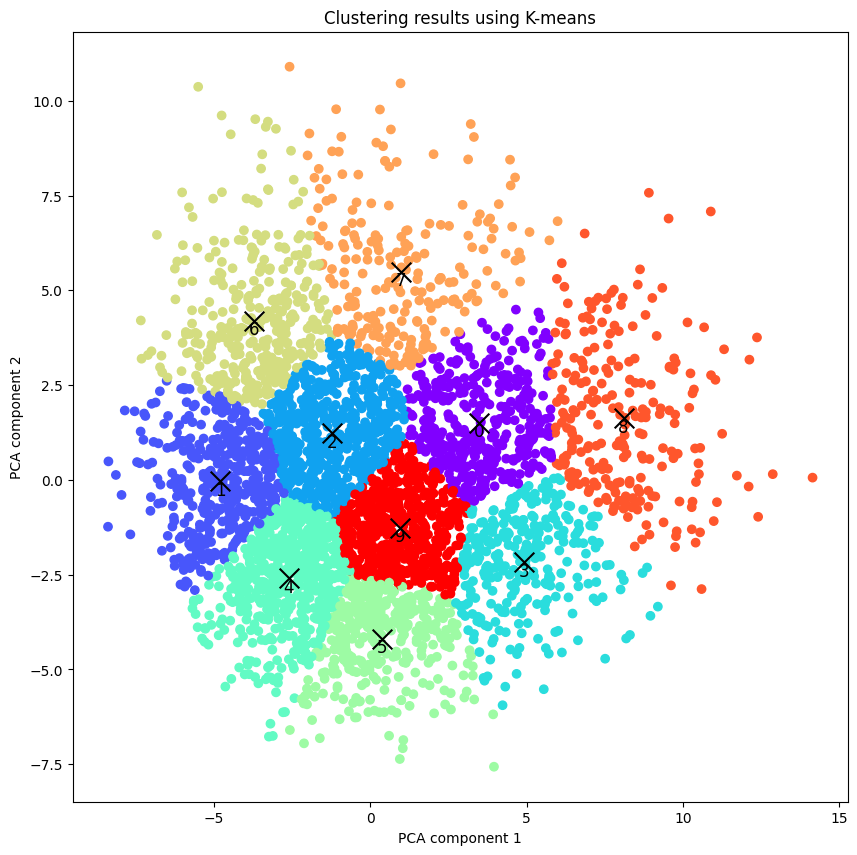

In [176]:

data_dir = "./genki4k/files"
# data_dir = "./genki4k/crop_img_data"
batch_size = 32
feature_dim = 2048
n_components = 10
n_clusters = 10
using_identity = True
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

train_loader, X = load_and_transform_images(data_dir, data_transforms, device, batch_size)
model = create_model(feature_dim, device, using_identity)
features = extract_features(model, train_loader)

# Set the clustering algorithm and parameters
# You can choose DBSCAN or K-means
# You can modify eps, min_samples, n_clusters, etc

cluster_algo = "K-means" # or "DBSCAN" 
eps = 0.5 # Parameter of DBSCAN, which represents the maximum distance between two samples considered as neighbors
min_samples = 5 # The DBSCAN parameter represents the number of neighbors that are considered core points in a sample
n_clusters = 10 # The K-means parameter represents the number of clusters

# PCA was used to reduce the dimension of features to 2 dimensions, and clustering algorithm was used to cluster the features
labels, centers, pca = pca_cluster(features, cluster_algo, eps, min_samples, n_clusters)

# Draw the result of the cluster
plot_clusters(pca.transform(features.cpu().numpy()), labels, centers, cluster_algo)


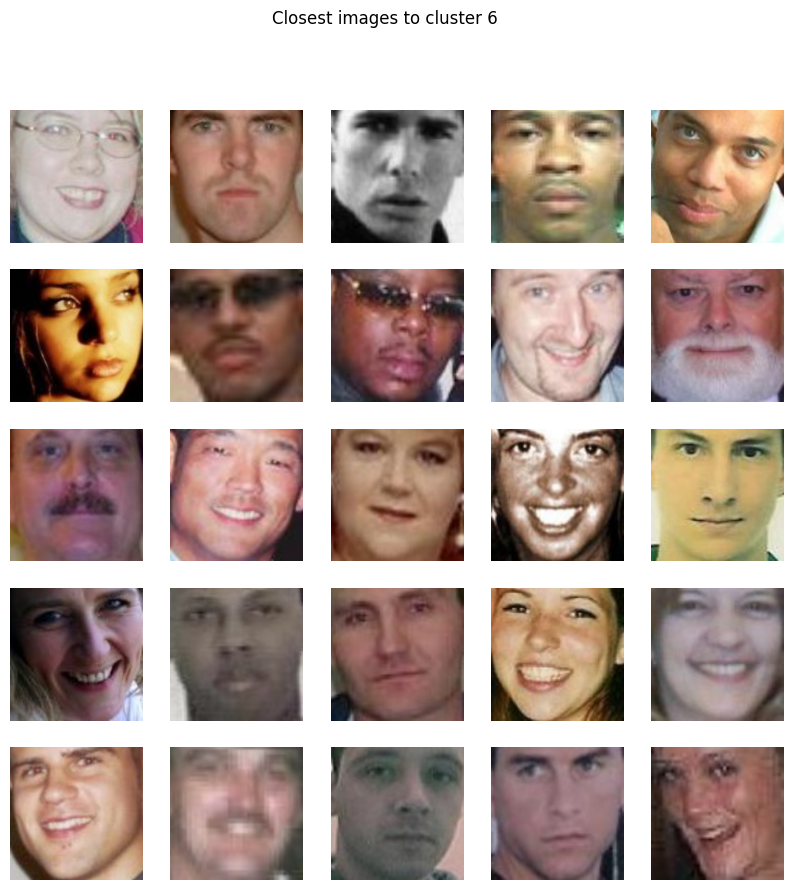

In [180]:
# Select a cluster to display the n_images closest to the center point
cluster = 6 # You can change this value from 0 to n_clusters-1
n_images = 25 # You can change this value, but not more than the number of images per cluster
show_closest_images(cluster, pca.transform(features.cpu().numpy()), centers, X, inverse_transform, device, n_images)

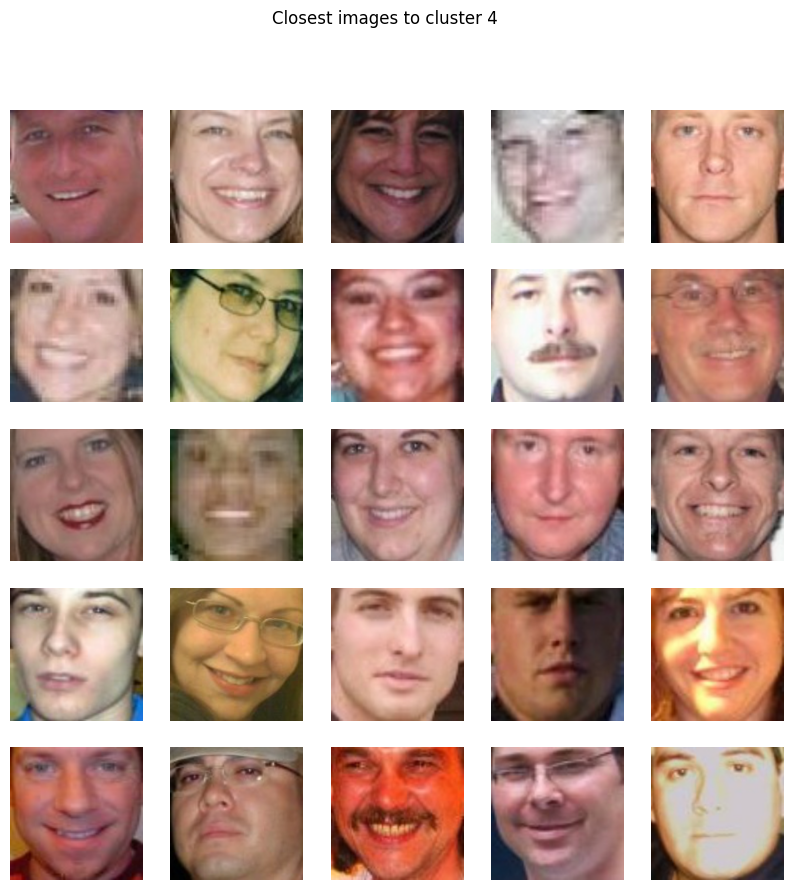

In [181]:
# Select a cluster to display the n_images closest to the center point
cluster = 4 # You can change this value from 0 to n_clusters-1
n_images = 25 # You can change this value, but not more than the number of images per cluster
show_closest_images(cluster, pca.transform(features.cpu().numpy()), centers, X, inverse_transform, device, n_images)

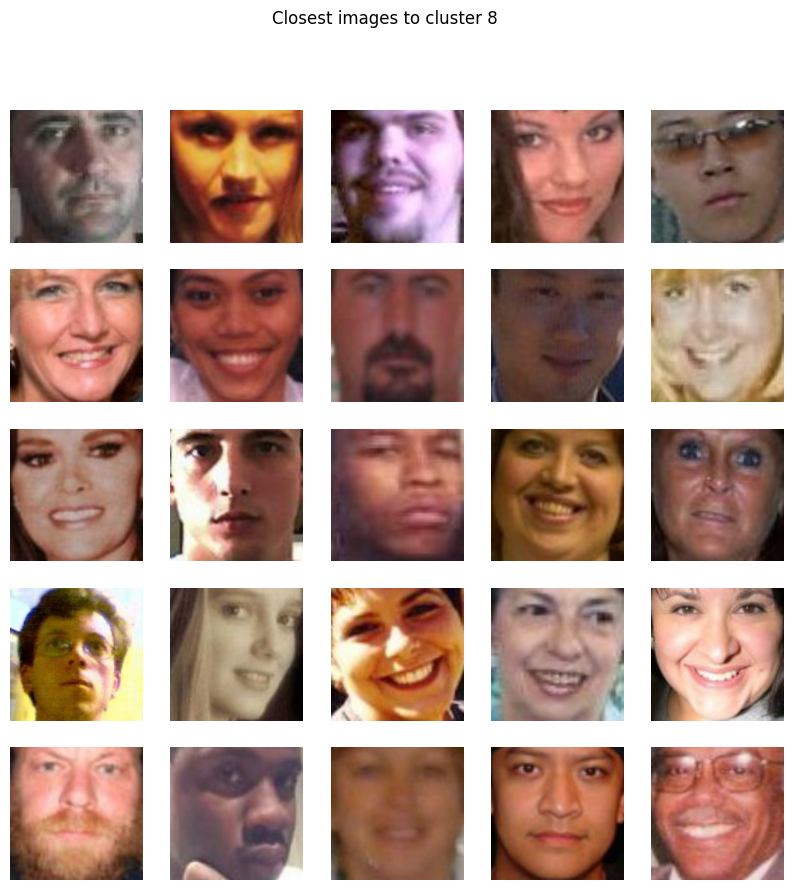

In [182]:
# Select a cluster to display the n_images closest to the center point
cluster = 8 # You can change this value from 0 to n_clusters-1
n_images = 25 # You can change this value, but not more than the number of images per cluster
show_closest_images(cluster, pca.transform(features.cpu().numpy()), centers, X, inverse_transform, device, n_images)

# 9 Conclusion

Unsupervised image clustering, also known as unlabeled classification, has several uses and effects:

**1. Pattern discovery**: It facilitates the identification of concealed patterns and structures within image data.  
**2. Anomaly detection**: It enables the detection of anomalies or outliers in the data. In the context of images, this entails identifying images that deviate from others in some manner.  
**3. Data compression**: By grouping similar images together, we can efficiently compress data and reduce storage and computational requirements.  
**4. Image segmentation**: In computer vision, image clustering is commonly employed for image segmentation – dividing an image into multiple regions where each region represents an object or a part of the image.  
 
In summary, unsupervised image clustering is a potent tool that aids in comprehending and leveraging image data.

Regarding experiments conducted with the 'n_clusters' parameter set to '2', reliable gender groups can be obtained from pictures.

As for other clustering effects, my experiment was unable to replicate the grouping effect based on wearing glasses or suits; however, there are still notable similarities among these pictures. The overall effect remains satisfactory.